In [50]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns

In [51]:
location = 'datasets/diamonds.csv'

In [52]:
dimond_df = pd.read_csv(location)
dimond_df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [53]:
modeldf = pd.get_dummies(data=dimond_df,columns=['color']) # color catagory variabel handeled by get_dummies function 
modeldf.head()

,Unnamed: 0,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,2,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,3,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,4,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,5,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1


In [54]:
dimond_df = modeldf[['carat','depth','table','price','color_D','color_E','color_F','color_G','color_H','color_I','color_J']]
dimond_df.head()

,carat,depth,table,price,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,0,0,0,0,0,0,1


In [43]:
dimond_df.corr()

,carat,depth,table,price,color_D,color_E,color_F,color_G,color_H,color_I,color_J
carat,1.000000,0.028224,0.181618,0.921591,-0.112057,-0.139215,-0.060052,-0.029038,0.102465,0.161494,0.180054
depth,0.028224,1.000000,-0.295779,-0.010647,-0.013566,-0.028713,-0.017741,0.002768,0.026037,0.022630,0.022543
table,0.181618,-0.295779,1.000000,0.127134,-0.008921,0.007172,-0.004906,-0.038815,0.011574,0.017967,0.037253
price,0.921591,-0.010647,0.127134,1.000000,-0.072473,-0.101089,-0.024161,0.008556,0.059223,0.097125,0.081710
color_D,-0.112057,-0.013566,-0.008921,-0.072473,1.000000,-0.178550,-0.175704,-0.195021,-0.161672,-0.126699,-0.088817
color_E,-0.139215,-0.028713,0.007172,-0.101089,-0.178550,1.000000,-0.218401,-0.242411,-0.200958,-0.157487,-0.110400
color_F,-0.060052,-0.017741,-0.004906,-0.024161,-0.175704,-0.218401,1.000000,-0.238547,-0.197755,-0.154977,-0.108640
color_G,-0.029038,0.002768,-0.038815,0.008556,-0.195021,-0.242411,-0.238547,1.000000,-0.219496,-0.172014,-0.120584
color_H,0.102465,0.026037,0.011574,0.059223,-0.161672,-0.200958,-0.197755,-0.219496,1.000000,-0.142600,-0.099964
color_I,0.161494,0.022630,0.017967,0.097125,-0.126699,-0.157487,-0.154977,-0.172014,-0.142600,1.000000,-0.078339


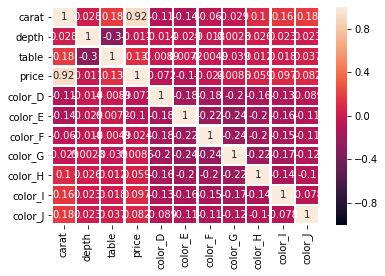

In [67]:
# representation of the corelation of each variabel of dimond data throgh graph 

corr = dimond_df.corr()
sns.heatmap (corr ,Cmap = 'gist_earth', linewidths= 1.5 ,annot=True,vmin=-1)

In [61]:
# from this what we can conclude there is strong relationship betwen carat of the dimond with the price of the dimond (0.92) close to one 
#  depth and tabel data of dimond least or negatively relation ship with the price of the dimond .


In [62]:
# linear regration the price of dimond data with diferent variabeles including 'color' catagory variabel .


In [66]:
import statsmodels.formula.api as smf


result = smf.ols('price ~ carat+depth+table+color_D+color_E+color_F+color_G+color_H+color_I+color_J',data=dimond_df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 3.938e+04
Date:                Fri, 01 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:42:40   Log-Likelihood:            -4.6917e+05
No. Observations:               53940   AIC:                         9.384e+05
Df Residuals:                   53930   BIC:                         9.385e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.025e+04    325.349     31.496      0.000    9609.603    1.09e+04
carat       8164.5991     14.098    579.152      0.000    8136.968    8192.230
depth       -138.2905      4.583    -30.176      0.000    -147.273    -129.308
table       -103.5463      2.987    -34.666      0.000    -109.401     -97.692
color_D     2028.3292     49.161     41.259      0.000    1931.973    2124.686
color_E     1938.5259     48.456     40.006      0.000    1843.552    2033.500
color_F     1942.8585     48.348     40.185      0.000    1848.096    2037.621
color_G     1927.8327     47.980     40.180      0.000    1833.792    2021.873
color_H     1302.1088     49.048     26.548      0.000    1205.974    1398.244
color_I      974.8152     50.103     19.456      0.000     876.613    1073.017
color_J      132.8193     53.243      2.495      0.013      28.462     237.176
==============================================================================
Omnibus:                    12426.902   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169599.805
Skew:                           0.729   Prob(JB):                         0.00
Kurtosis:                      11.564   Cond. No.                     6.95e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""